<a href="https://colab.research.google.com/github/joachinhimself/My-projects-/blob/main/web_scrapping_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install selenium

     |████████████████████████████████| 958 kB 12.0 MB/s 
     |████████████████████████████████| 356 kB 55.0 MB/s 
     |████████████████████████████████| 138 kB 58.5 MB/s 
     |████████████████████████████████| 3.6 MB 42.6 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import csv
from time import sleep

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:13 https://developer.download.n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [4]:
url =  (("https://app2.hkp.com.hk/utx/default.jsp?lang=en"))
driver.get(url)
subhtml = driver.page_source
soup = BeautifulSoup(subhtml, "html.parser")
xpaths = ['//*[@id="tblHKEstList"]/tbody/tr[2]/td[1]/span']
for path in xpaths:
    button = driver.find_element_by_xpath(path)
    button.click()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  import sys


In [5]:
#Curr & notCurr
building = driver.find_elements_by_xpath('//*[@id="DtlTable2"]/tbody/tr/td[2]/table/tbody/tr/td/a')
buildlink = list(zip([i.get_attribute('href') for i in building] ,[name.text for name in building]))
# link + building name 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  


In [6]:
for link in buildlink:
    driver.get(link[0])   #link
    xpaths = ['//*[@id="tx_record_3"]']
    for path in xpaths:
        button = driver.find_element_by_xpath(path)
        button.click()
    sleep(3)   
    a = driver.find_elements_by_xpath('//*[@id="Tx_hist_table"]/tbody/tr')
    alist = [i.text for i in a]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  


In [7]:
with open('TKS.csv','a') as f:
        csv_writer = csv.writer(f)
        for row in alist:
            csv_writer.writerow([link[1]]+row.split())  #building name

In [8]:
#New code that will add names to each column

row = ['Location','Floor','Flat','Saleable_Area','Gross_Area','Price','Pricepft^2_Saleable','Pricepft^2_Gross','Transaction_date','Time','Change','Last_Transaction_Date','Time']

In [9]:
with open('TKS.csv', 'r') as readFile:
    rd = csv.reader(readFile)
    lines = list(rd)
    lines.insert(0, row)

In [10]:
with open('TKS.csv', 'w',newline='') as writeFile:
    wt = csv.writer(writeFile)
    wt.writerows(lines)

In [11]:
readFile.close()
writeFile.close()

In [12]:
#New code that will remove blank spaces from the data

df = pd.read_csv('TKS.csv')
df.to_csv('TKS1.csv', index=False)

In [13]:
#New code that removes unessasary pieces of code creating final piece of data

df = pd.read_csv('TKS1.csv', names = ['Location','Floor','Flat','Saleable_Area','Gross_Area','Price','Pricepft^2_Saleable','Pricepft^2_Gross','Transaction_date','Time1','Change','Last_Transaction_Date','Time2'])
df.drop('Time1', axis=1, inplace=True)
df.drop('Time2', axis=1, inplace=True)
df.to_csv('TKSFINAL.csv') #Final CSV data set is known as 'TKSFINAL.csv'

In [14]:
df.head()

,Location,Floor,Flat,Saleable_Area,Gross_Area,Price,Pricepft^2_Saleable,Pricepft^2_Gross,Transaction_date,Change,Last_Transaction_Date
0,Location,Floor,Flat,Saleable_Area,Gross_Area,Price,Pricepft^2_Saleable,Pricepft^2_Gross,Transaction_date,Change,Last_Transaction_Date
1,Harbour View Gardens (East)\nWisteria Mansion,28,B,"1,180","1,308",750,"6,357","5,734",2003-11-28,NaN,NaN
2,Harbour View Gardens (East)\nWisteria Mansion,28,C,"1,046","1,137",885,"8,459","7,784",2007-02-01,-26.2%,1997-04-24
3,Harbour View Gardens (East)\nWisteria Mansion,28,C,"1,046","1,137",1200,"11,469","10,554",1997-04-24,+12.2%,1997-03-11
4,Harbour View Gardens (East)\nWisteria Mansion,28,C,"1,046","1,137",1070,"10,227","9,411",1997-03-11,+13.2%,1996-12-10


In [15]:
df.drop(df.index[0])
df = df.drop(df.index[0])
df.head()

,Location,Floor,Flat,Saleable_Area,Gross_Area,Price,Pricepft^2_Saleable,Pricepft^2_Gross,Transaction_date,Change,Last_Transaction_Date
1,Harbour View Gardens (East)\nWisteria Mansion,28,B,"1,180","1,308",750,"6,357","5,734",2003-11-28,NaN,NaN
2,Harbour View Gardens (East)\nWisteria Mansion,28,C,"1,046","1,137",885,"8,459","7,784",2007-02-01,-26.2%,1997-04-24
3,Harbour View Gardens (East)\nWisteria Mansion,28,C,"1,046","1,137",1200,"11,469","10,554",1997-04-24,+12.2%,1997-03-11
4,Harbour View Gardens (East)\nWisteria Mansion,28,C,"1,046","1,137",1070,"10,227","9,411",1997-03-11,+13.2%,1996-12-10
5,Harbour View Gardens (East)\nWisteria Mansion,28,C,"1,046","1,137",945,"9,032","8,311",1996-12-10,NaN,NaN


In [16]:
df.shape

(257, 11)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 1 to 257
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Location               257 non-null    object
 1   Floor                  257 non-null    object
 2   Flat                   257 non-null    object
 3   Saleable_Area          257 non-null    object
 4   Gross_Area             257 non-null    object
 5   Price                  257 non-null    object
 6   Pricepft^2_Saleable    257 non-null    object
 7   Pricepft^2_Gross       257 non-null    object
 8   Transaction_date       257 non-null    object
 9   Change                 132 non-null    object
 10  Last_Transaction_Date  132 non-null    object
dtypes: object(11)
memory usage: 24.1+ KB


In [18]:
df.nunique()

Location                   1
Floor                     26
Flat                       8
Saleable_Area              7
Gross_Area                 6
Price                    202
Pricepft^2_Saleable      243
Pricepft^2_Gross         237
Transaction_date         248
Change                   129
Last_Transaction_Date    129
dtype: int64

In [19]:
df.describe()

,Location,Floor,Flat,Saleable_Area,Gross_Area,Price,Pricepft^2_Saleable,Pricepft^2_Gross,Transaction_date,Change,Last_Transaction_Date
count,257,257,257,257,257,257,257,257,257,132,132
unique,1,26,8,7,6,202,243,237,248,129,129
top,Harbour View Gardens (East)\nWisteria Mansion,6,H,"1,114","1,237",980,"9,556","8,531",2006-12-14,+37.6%,2006-12-14
freq,257,21,44,87,87,5,3,3,2,2,2


In [20]:
missing_values = df.isnull().sum()
missing_values

Location                   0
Floor                      0
Flat                       0
Saleable_Area              0
Gross_Area                 0
Price                      0
Pricepft^2_Saleable        0
Pricepft^2_Gross           0
Transaction_date           0
Change                   125
Last_Transaction_Date    125
dtype: int64

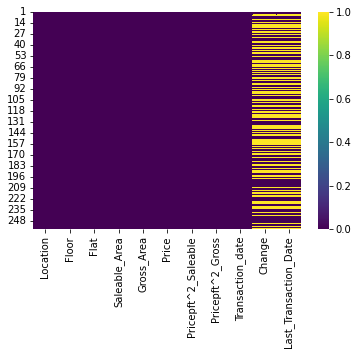

In [23]:
import seaborn as sns
missing_values = df.isnull()
missing_values
sns.heatmap(data = missing_values, cmap='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


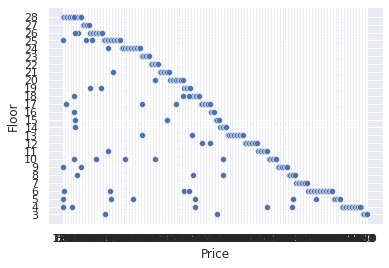

In [25]:
import seaborn as sns
sns.set()
sns.scatterplot(df['Price'], df['Floor'])